In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns
import glob, os
from pyecharts import *

plt.rc("font", family="Malgun Gothic")

In [3]:
files = glob.glob(os.path.join('./data/bohum/','*계약건수*'))

columnNames = ['기준년월', '출생년월', '연령', '성별', '보장항목코드', '보장항목명', '보험회사구분코드', '보험회사구분명',
               '보험회사코드','보험회사명', '보유계약건수']

data = []

for i in range(len(files)):
             
    series = pd.read_csv(files[i], names=columnNames, encoding='cp949', skiprows=[0])

    data.append(series)
    
    
data = pd.concat(data, axis=0, ignore_index=True)

data.to_csv("bohum_list.csv", mode='w', encoding='cp949', index = False)

In [4]:
df = pd.read_csv("./bohum_list.csv", encoding='cp949')

df

,기준년월,출생년월,연령,성별,보장항목코드,보장항목명,보험회사구분코드,보험회사구분명,보험회사코드,보험회사명,보유계약건수
0,201911,198808,32,F,2,암사망,2,손해보험,11,KB손해보험,10
1,201911,198805,32,F,2,암사망,2,손해보험,11,KB손해보험,8
2,201911,198307,37,M,1,질병사망,3,기타,33,우정사업본부,5
3,201911,197710,43,F,16,골절진단비,2,손해보험,13,MG손해보험,5
4,201911,197602,44,F,16,골절진단비,3,기타,33,우정사업본부,1
...,...,...,...,...,...,...,...,...,...,...,...
2456534,202011,198609,35,M,9,대중교통상해후유장해,2,손해보험,26,삼성화재해상보험,53
2456535,202011,198609,35,M,8,교통상해후유장해,2,손해보험,26,삼성화재해상보험,53
2456536,202011,198609,35,M,7,상해후유장해3%이상,2,손해보험,26,삼성화재해상보험,46
2456537,202011,198609,35,M,3,상해사망,2,손해보험,26,삼성화재해상보험,54


In [5]:
df.isnull().sum()
df = df.dropna(axis=0)

In [6]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

df['성별코드'] = df['성별'].apply(lambda x : str(x).replace('M', '0'))
df['성별코드'] = df['성별코드'].apply(lambda x : str(x).replace('F', '1'))

In [7]:
df

,기준년월,출생년월,연령,성별,보장항목코드,보장항목명,보험회사구분코드,보험회사구분명,보험회사코드,보험회사명,보유계약건수,성별코드
0,2019-11-01,198808,32,F,2,암사망,2,손해보험,11,KB손해보험,10,1
1,2019-11-01,198805,32,F,2,암사망,2,손해보험,11,KB손해보험,8,1
2,2019-11-01,198307,37,M,1,질병사망,3,기타,33,우정사업본부,5,0
3,2019-11-01,197710,43,F,16,골절진단비,2,손해보험,13,MG손해보험,5,1
4,2019-11-01,197602,44,F,16,골절진단비,3,기타,33,우정사업본부,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2456534,2020-11-01,198609,35,M,9,대중교통상해후유장해,2,손해보험,26,삼성화재해상보험,53,0
2456535,2020-11-01,198609,35,M,8,교통상해후유장해,2,손해보험,26,삼성화재해상보험,53,0
2456536,2020-11-01,198609,35,M,7,상해후유장해3%이상,2,손해보험,26,삼성화재해상보험,46,0
2456537,2020-11-01,198609,35,M,3,상해사망,2,손해보험,26,삼성화재해상보험,54,0


In [8]:
df['연령'].unique()

array([ 32,  37,  43,  44,  48,  66,  39,  62,  47,  54,  26,  42,  49,
        55,  51,  57,  27,  33,  30,  34,  22,   8,  25,  56,  59,  20,
        38,  31,  50,  41,  68,  60,  29,  36,  40,  23,  24,  18,  71,
        67,  63,  72,  35,  45,  61,  52,  28,  53,  58,  75,  70,  65,
        64,  73,  74,  17,  69,  76,  78,  46,  80,  21,  15,  77,  16,
        10,   4,  12,  19,  79,  11,   3,   6,   1,   5,  13,   9,   7,
        14,  86,  85,  81,  82,  83,  93,   2,  84,  87,  94, 157, 165,
       148], dtype=int64)

In [9]:
df = df.drop(df[(df['연령'] == 157) | (df['연령'] == 165)].index)

df

,기준년월,출생년월,연령,성별,보장항목코드,보장항목명,보험회사구분코드,보험회사구분명,보험회사코드,보험회사명,보유계약건수,성별코드
0,2019-11-01,198808,32,F,2,암사망,2,손해보험,11,KB손해보험,10,1
1,2019-11-01,198805,32,F,2,암사망,2,손해보험,11,KB손해보험,8,1
2,2019-11-01,198307,37,M,1,질병사망,3,기타,33,우정사업본부,5,0
3,2019-11-01,197710,43,F,16,골절진단비,2,손해보험,13,MG손해보험,5,1
4,2019-11-01,197602,44,F,16,골절진단비,3,기타,33,우정사업본부,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2456534,2020-11-01,198609,35,M,9,대중교통상해후유장해,2,손해보험,26,삼성화재해상보험,53,0
2456535,2020-11-01,198609,35,M,8,교통상해후유장해,2,손해보험,26,삼성화재해상보험,53,0
2456536,2020-11-01,198609,35,M,7,상해후유장해3%이상,2,손해보험,26,삼성화재해상보험,46,0
2456537,2020-11-01,198609,35,M,3,상해사망,2,손해보험,26,삼성화재해상보험,54,0


In [10]:
df['연령'].unique()

array([ 32,  37,  43,  44,  48,  66,  39,  62,  47,  54,  26,  42,  49,
        55,  51,  57,  27,  33,  30,  34,  22,   8,  25,  56,  59,  20,
        38,  31,  50,  41,  68,  60,  29,  36,  40,  23,  24,  18,  71,
        67,  63,  72,  35,  45,  61,  52,  28,  53,  58,  75,  70,  65,
        64,  73,  74,  17,  69,  76,  78,  46,  80,  21,  15,  77,  16,
        10,   4,  12,  19,  79,  11,   3,   6,   1,   5,  13,   9,   7,
        14,  86,  85,  81,  82,  83,  93,   2,  84,  87,  94, 148],
      dtype=int64)

In [11]:
def age_group(age):
    
    if age >= 1 and age < 10:
        return '1s'
    elif age >= 10 and age < 20:
        return '10s'
    elif age >= 20 and age < 30:
        return '20s'
    elif age >= 30 and age < 40:
        return '30s'
    elif age >= 40 and age < 50:
        return '40s'
    elif age >= 50 and age < 60:
        return '50s'
    elif age >= 60 and age < 70:
        return '60s'
    elif age >= 70 and age < 80:
        return '70s'
    elif age >= 80 and age < 90:
        return '80s'
    elif age >= 90 and age < 100:
        return '90s'
    
df['연령그룹'] = df['연령'].apply(lambda x : age_group(x))

In [12]:
df

,기준년월,출생년월,연령,성별,보장항목코드,보장항목명,보험회사구분코드,보험회사구분명,보험회사코드,보험회사명,보유계약건수,성별코드,연령그룹
0,2019-11-01,198808,32,F,2,암사망,2,손해보험,11,KB손해보험,10,1,30s
1,2019-11-01,198805,32,F,2,암사망,2,손해보험,11,KB손해보험,8,1,30s
2,2019-11-01,198307,37,M,1,질병사망,3,기타,33,우정사업본부,5,0,30s
3,2019-11-01,197710,43,F,16,골절진단비,2,손해보험,13,MG손해보험,5,1,40s
4,2019-11-01,197602,44,F,16,골절진단비,3,기타,33,우정사업본부,1,1,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456534,2020-11-01,198609,35,M,9,대중교통상해후유장해,2,손해보험,26,삼성화재해상보험,53,0,30s
2456535,2020-11-01,198609,35,M,8,교통상해후유장해,2,손해보험,26,삼성화재해상보험,53,0,30s
2456536,2020-11-01,198609,35,M,7,상해후유장해3%이상,2,손해보험,26,삼성화재해상보험,46,0,30s
2456537,2020-11-01,198609,35,M,3,상해사망,2,손해보험,26,삼성화재해상보험,54,0,30s


In [13]:
bozang = df[['기준년월', '연령', '연령그룹', '성별', '성별코드', '보장항목명', '보험회사구분명', '보험회사명', '보유계약건수']]

In [14]:
aa = bozang.loc[bozang['보험회사명']=='삼성화재해상보험']
aa = aa.loc[aa['연령']==53]

aa = aa.loc[aa['성별']=='F']

aa = aa.loc[aa['보장항목명']=='대중교통상해후유장해']

aa.sort_values(by='보유계약건수', ascending=False)

,기준년월,연령,연령그룹,성별,성별코드,보장항목명,보험회사구분명,보험회사명,보유계약건수
2127081,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,60
2359638,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,58
2139920,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,53
1952287,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,52
2233164,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,51
2192798,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,50
1962635,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,47
1050418,2019-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,46
2281382,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,46
2086443,2020-11-01,53,50s,F,1,대중교통상해후유장해,손해보험,삼성화재해상보험,43


In [15]:
df2019 = bozang[bozang['기준년월'].dt.year == 2019]
df2020 = bozang[bozang['기준년월'].dt.year == 2020]

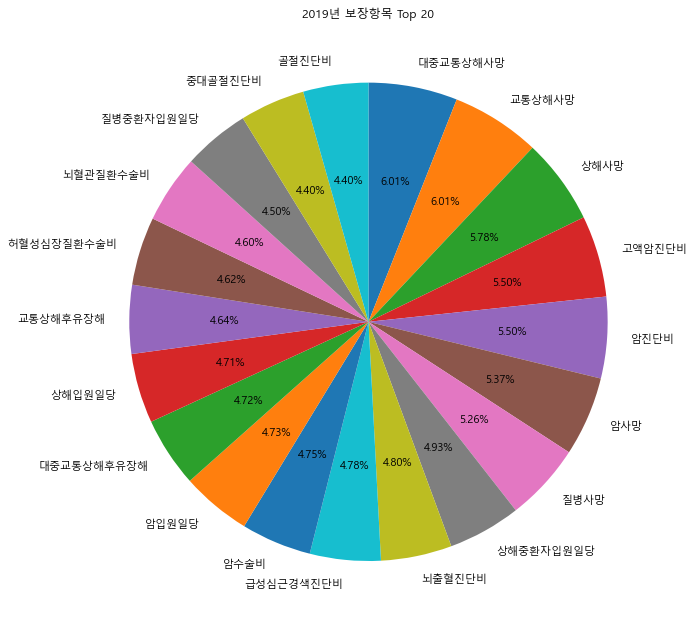

In [16]:
df2019_co_cnt = df2019['보장항목명'].value_counts(ascending=False).head(20)

fig = plt.figure(figsize=(11,11)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색
 
plt.title("2019년 보장항목 Top 20")
plt.pie(x=df2019_co_cnt.values,
       labels=df2019_co_cnt.index,
       startangle=90,
       counterclock=False,
       textprops={'fontsize': 11},
       autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력

plt.show()

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


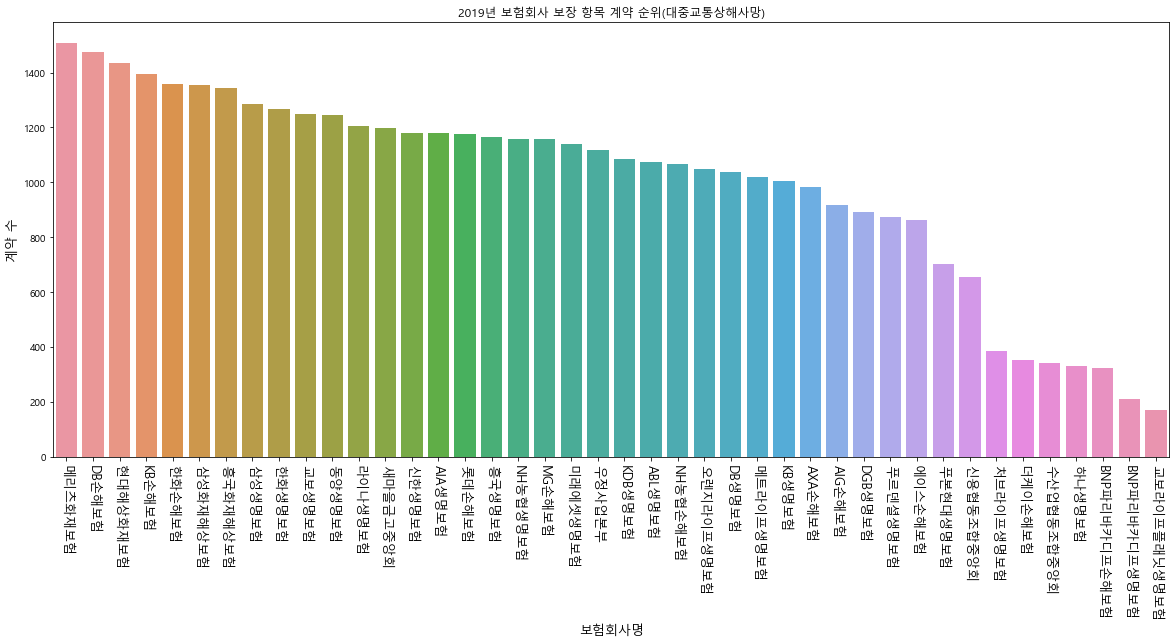

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


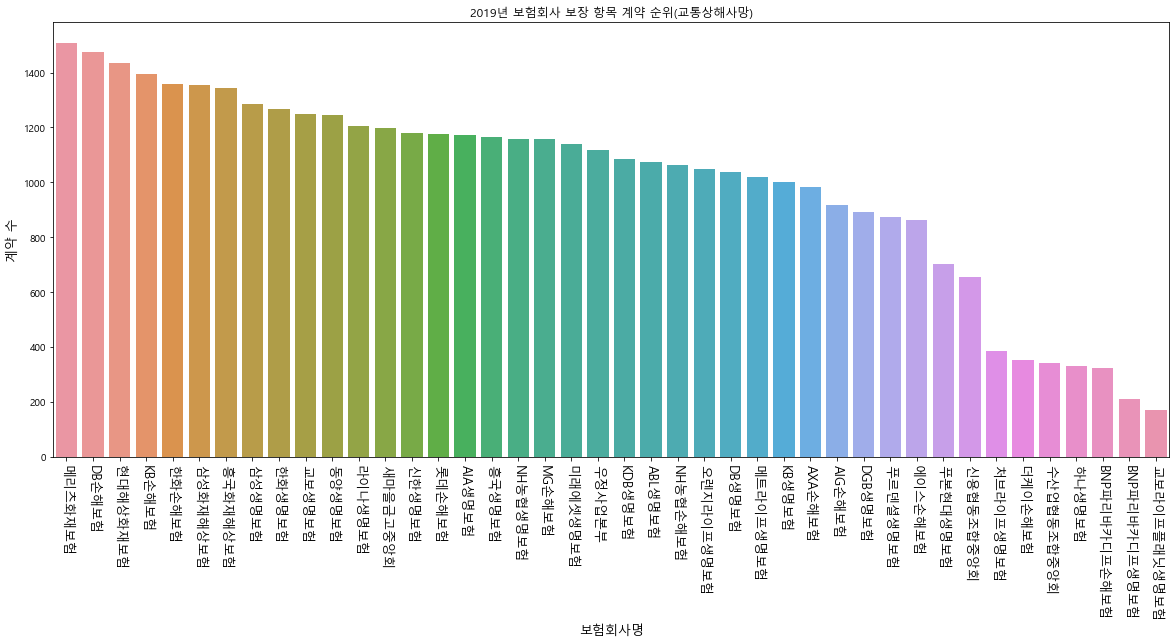

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


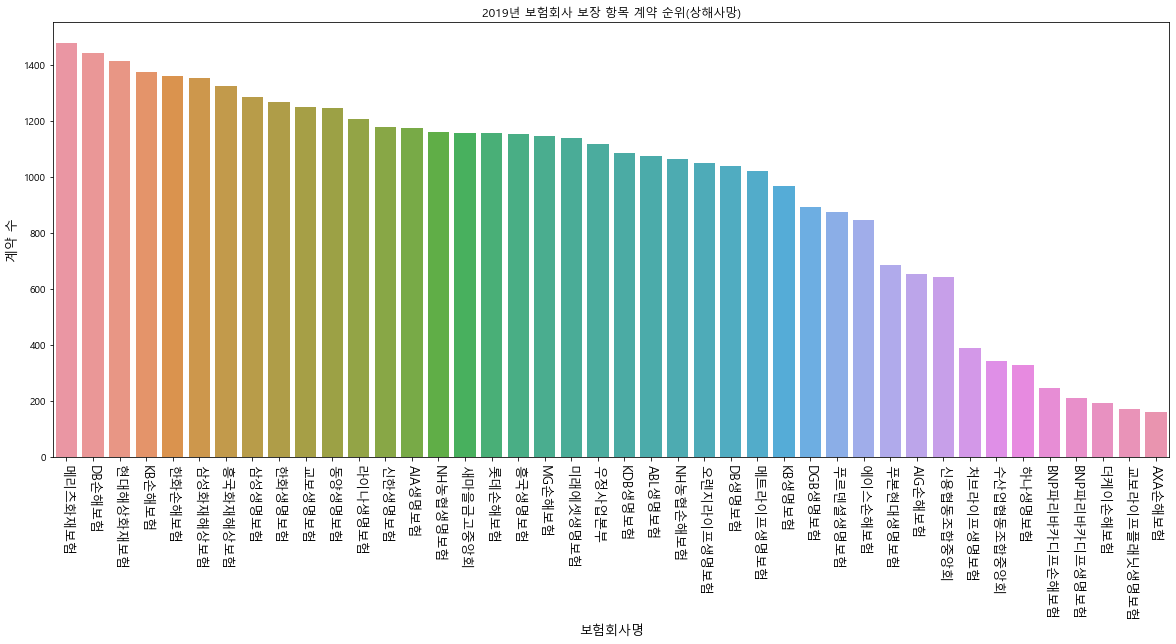

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


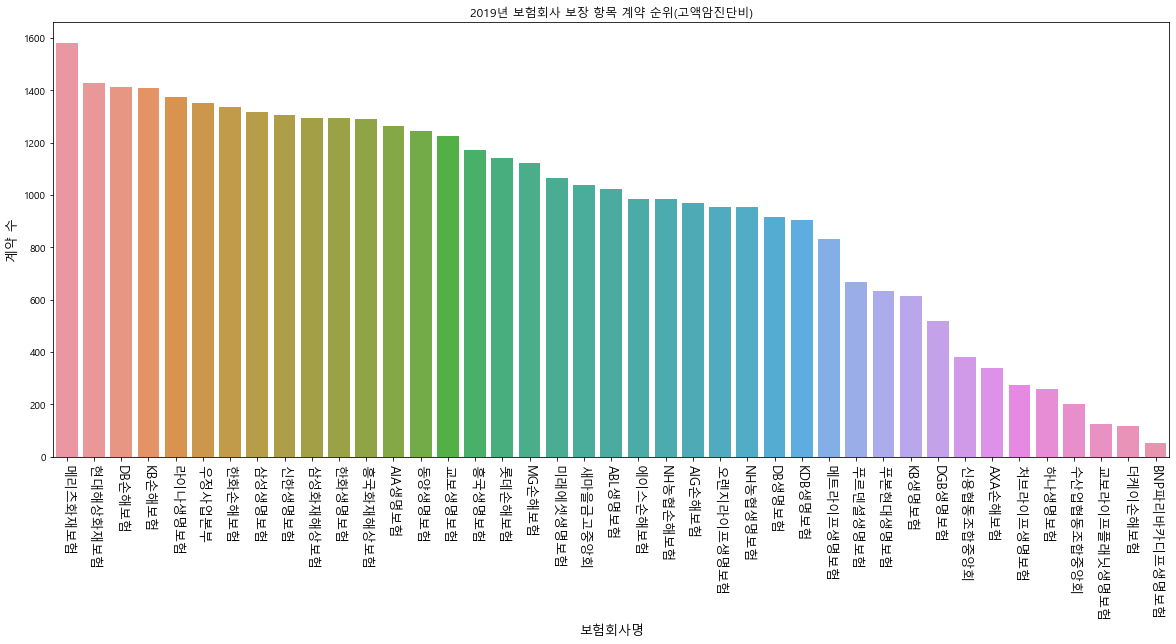

In [17]:
list = ['대중교통상해사망','교통상해사망','상해사망','고액암진단비']

for index in list:
    df2019_co_cnt = df2019[df2019['보장항목명'] == index]['보험회사명'].value_counts()

    ax = plt.subplots(figsize=(20,8))
    plt.xticks([0,1],rotation = 270, fontsize=13)
    ax = sns.barplot(df2019_co_cnt.index, df2019_co_cnt.values)
    ax.set_xlabel("보험회사명", fontsize=13)
    ax.set_ylabel("계약 수", fontsize=13)
    ax.set_title("2019년 보험회사 보장 항목 계약 순위("+index+")")
    plt.show()

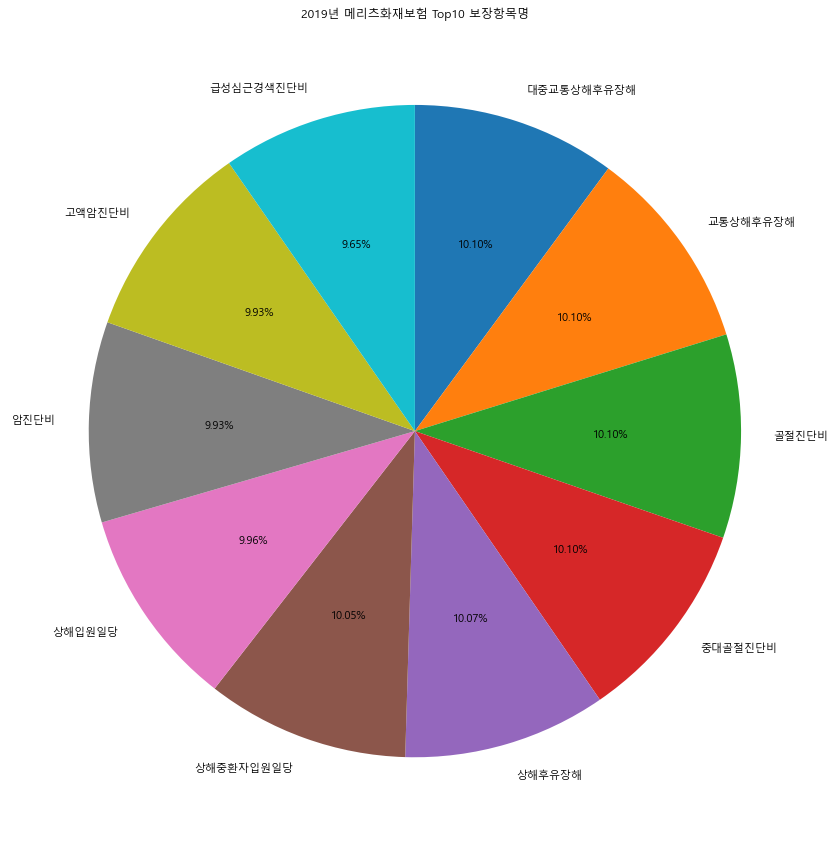

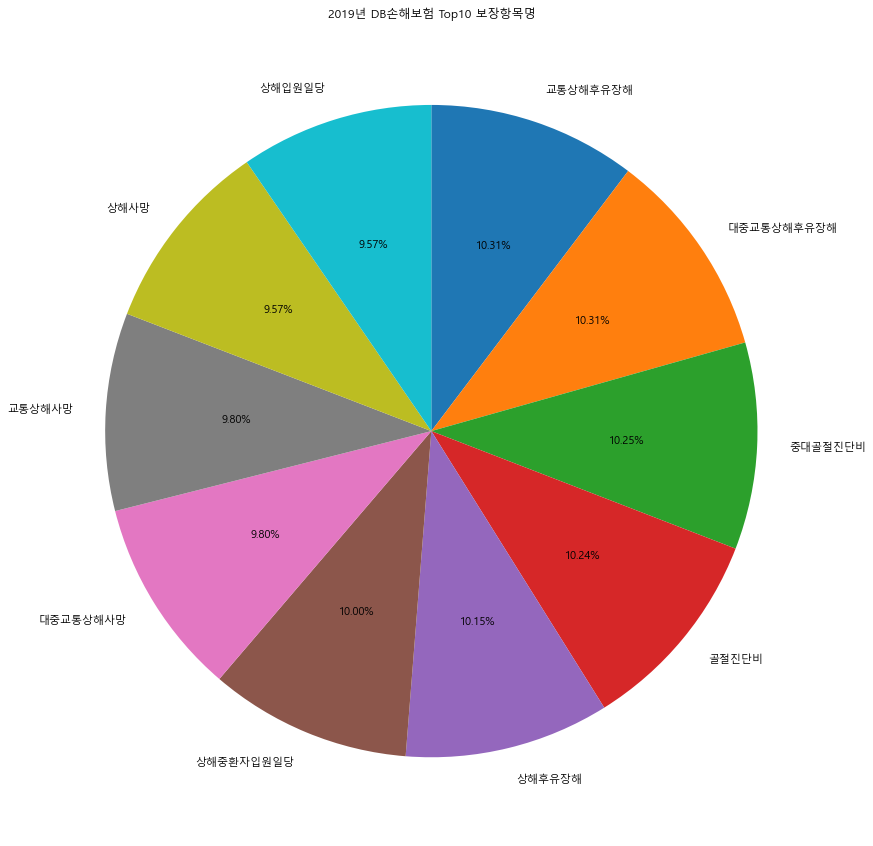

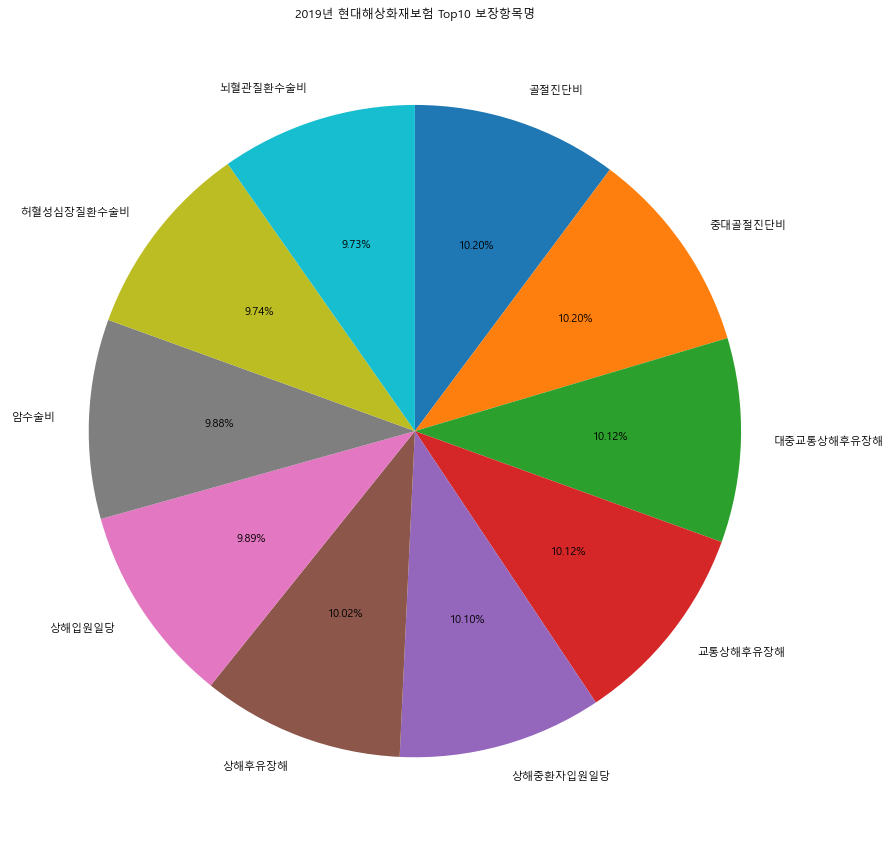

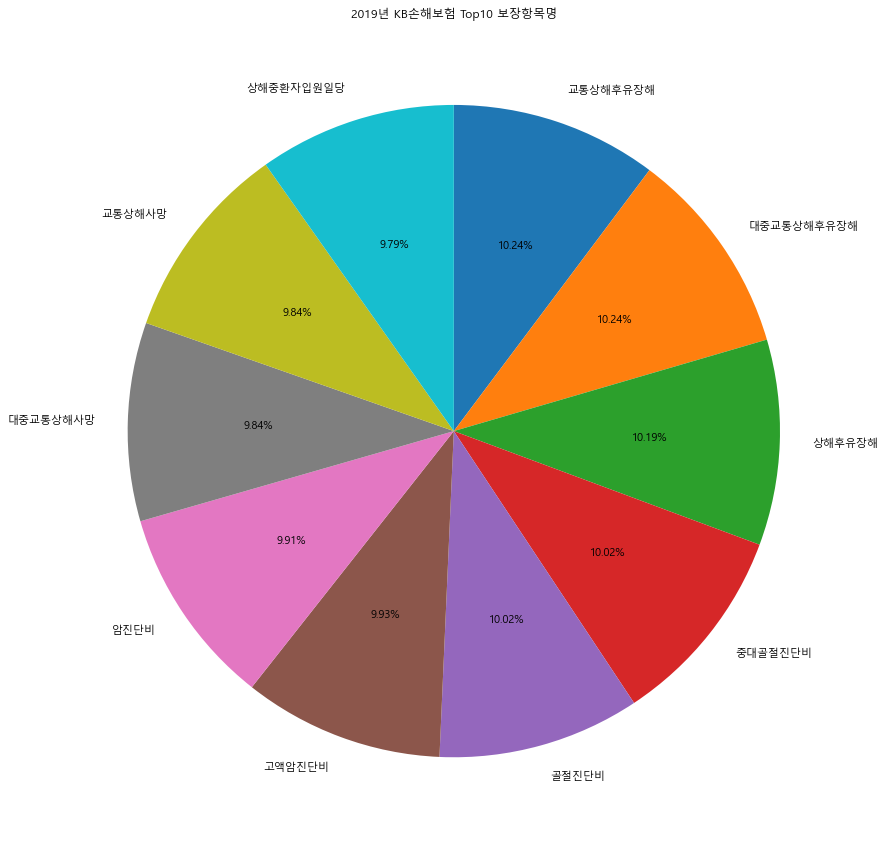

In [18]:
list=['메리츠화재보험','DB손해보험','현대해상화재보험','KB손해보험']

for index in list:
    df2019_co_cnt = df2019[df2019['보험회사명'] == index]['보장항목명'].value_counts().head(10)

    fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 하얀색

    plt.title("2019년 "+index+" Top10 보장항목명")
    plt.pie(x=df2019_co_cnt.values,
           labels=df2019_co_cnt.index,
           startangle=90,
           counterclock=False,
           textprops={'fontsize': 11},
           autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력

    plt.show()

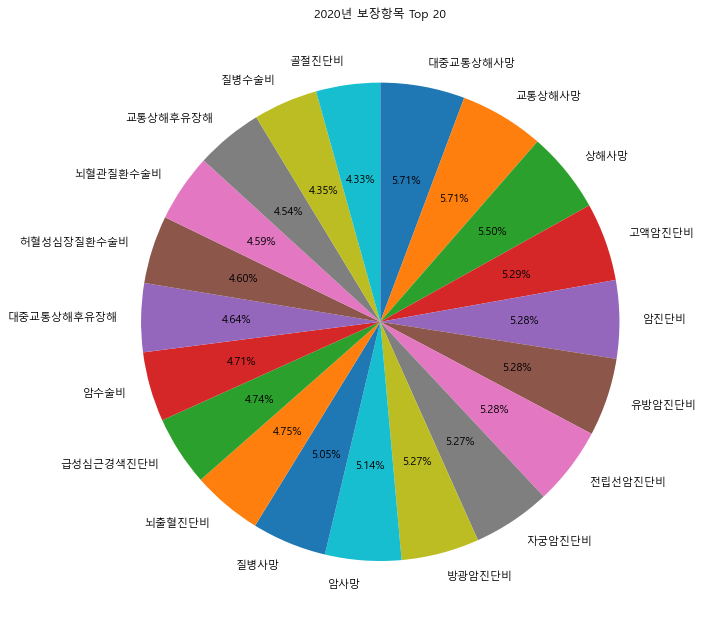

In [19]:
df2020_co_cnt = df2020['보장항목명'].value_counts(ascending=False).head(20)

fig = plt.figure(figsize=(11,11)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색
 
ax = fig.add_subplot() ## 프래임 생성
 
plt.title("2020년 보장항목 Top 20")
plt.pie(x=df2020_co_cnt.values,
       labels=df2020_co_cnt.index,
       startangle=90,
       counterclock=False,
       textprops={'fontsize': 11},
       autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력

plt.show()

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


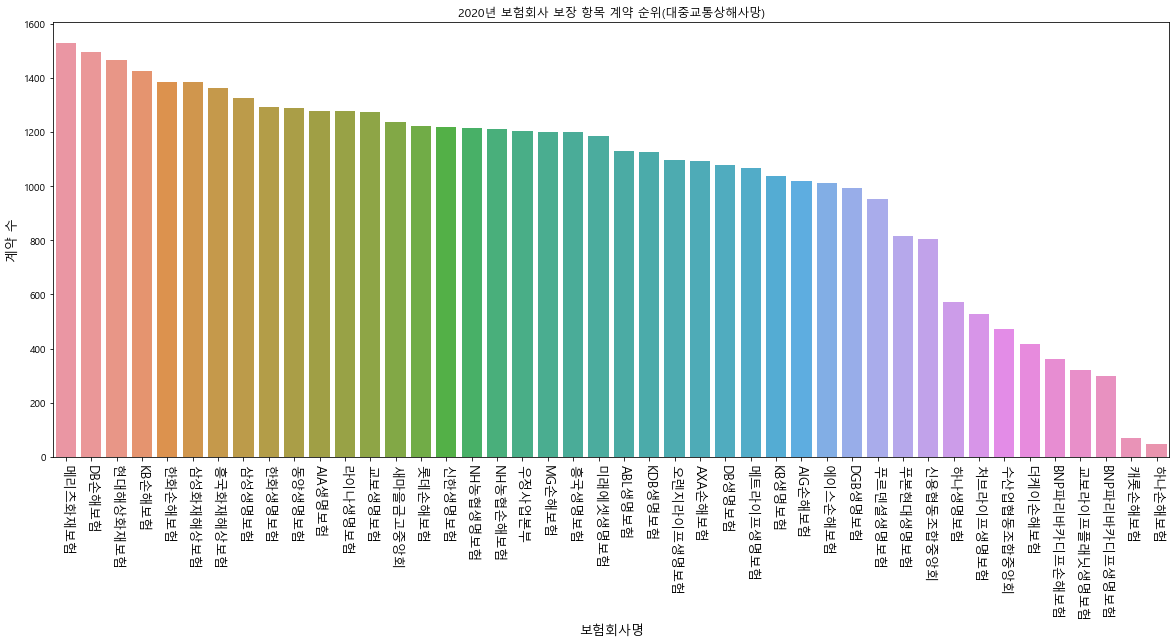

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


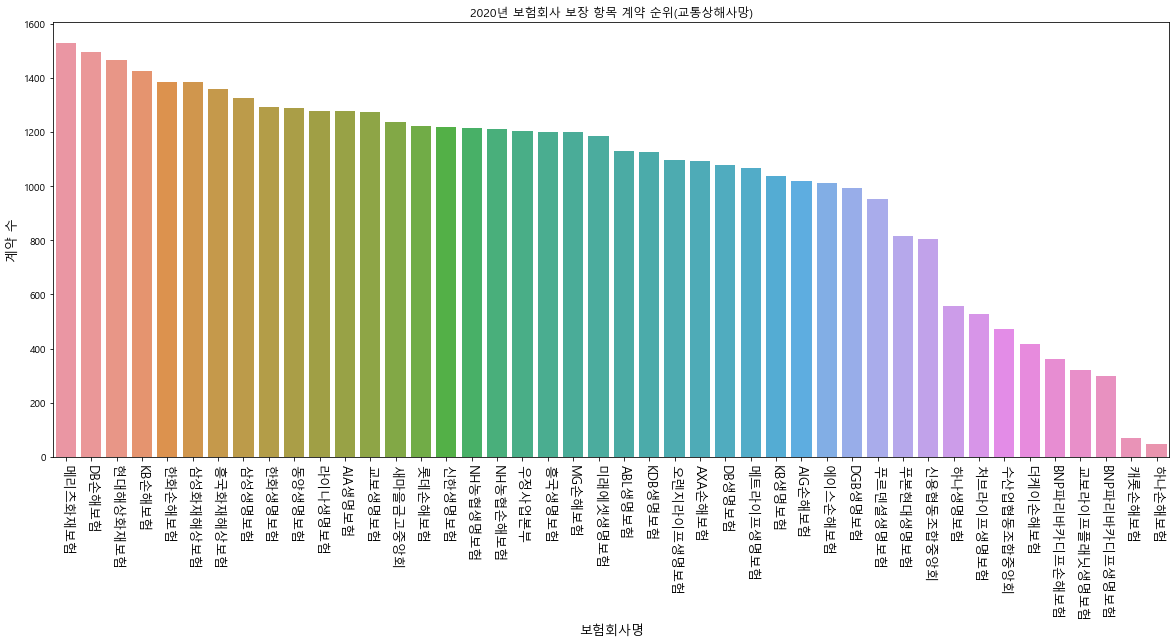

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


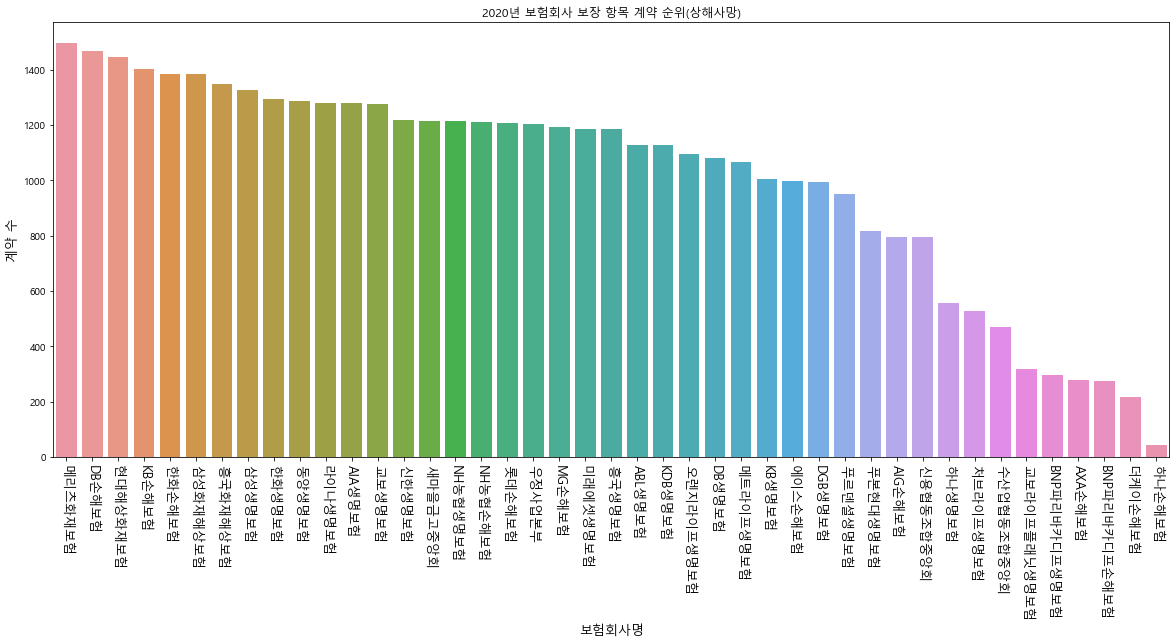

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


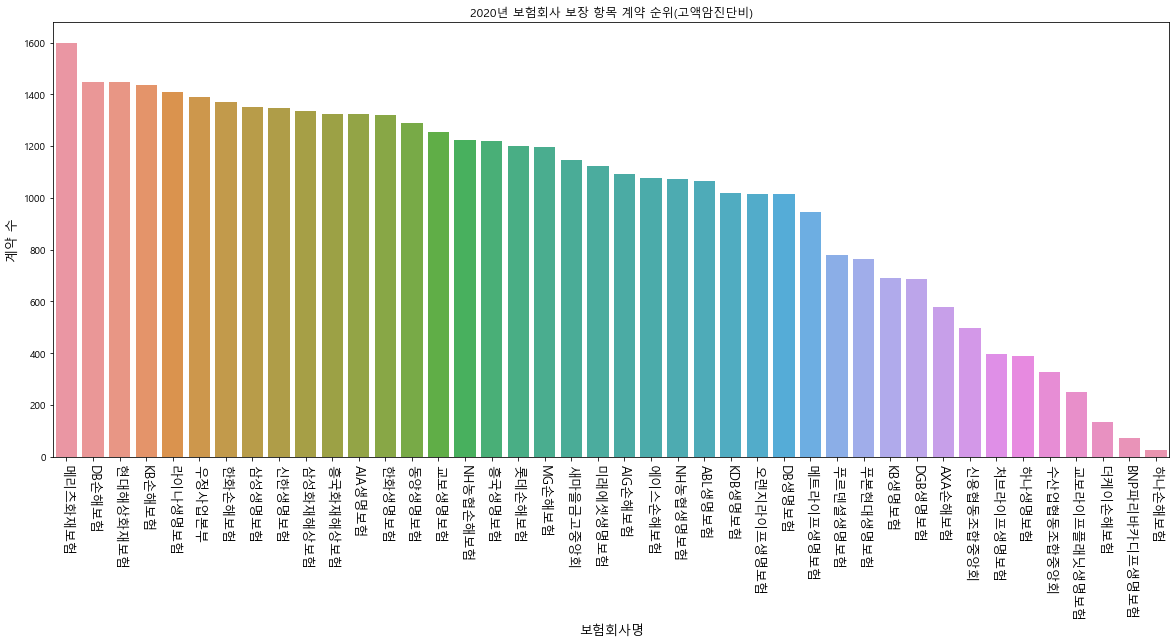

In [20]:
list = ['대중교통상해사망','교통상해사망','상해사망','고액암진단비']

for index in list:
    df2020_co_cnt = df2020[df2020['보장항목명'] == index]['보험회사명'].value_counts()

    ax = plt.subplots(figsize=(20,8))
    plt.xticks([0,1],rotation = 270, fontsize=13)
    ax = sns.barplot(df2020_co_cnt.index, df2020_co_cnt.values)
    ax.set_xlabel("보험회사명", fontsize=13)
    ax.set_ylabel("계약 수", fontsize=13)
    ax.set_title("2020년 보험회사 보장 항목 계약 순위("+index+")")
    plt.show()

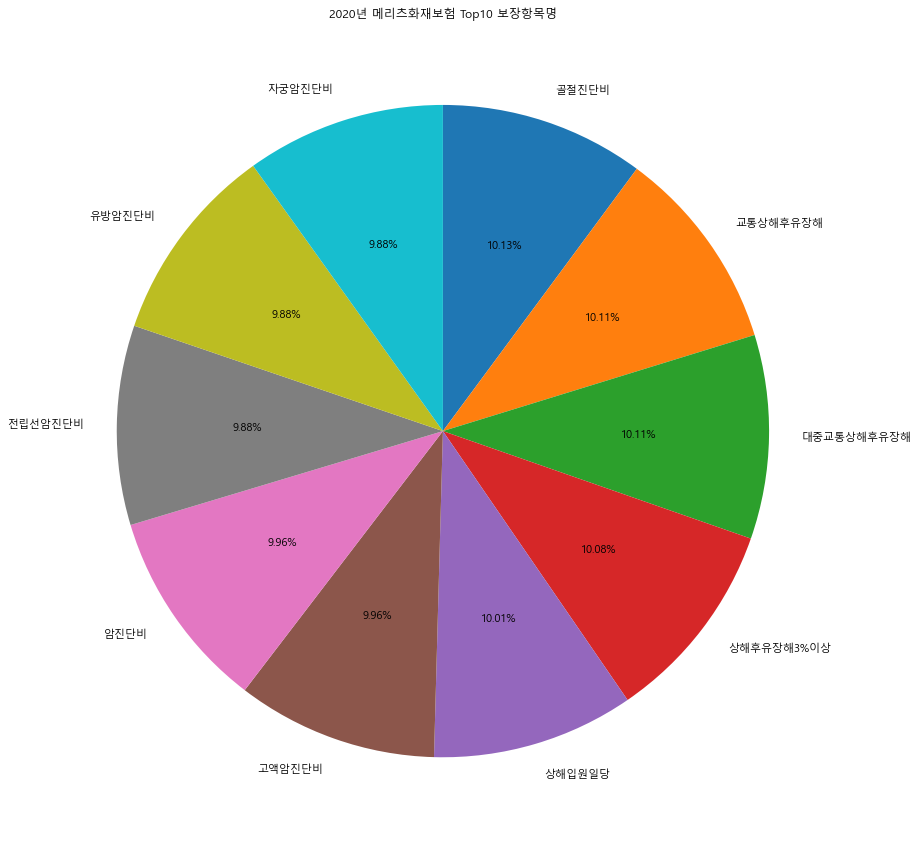

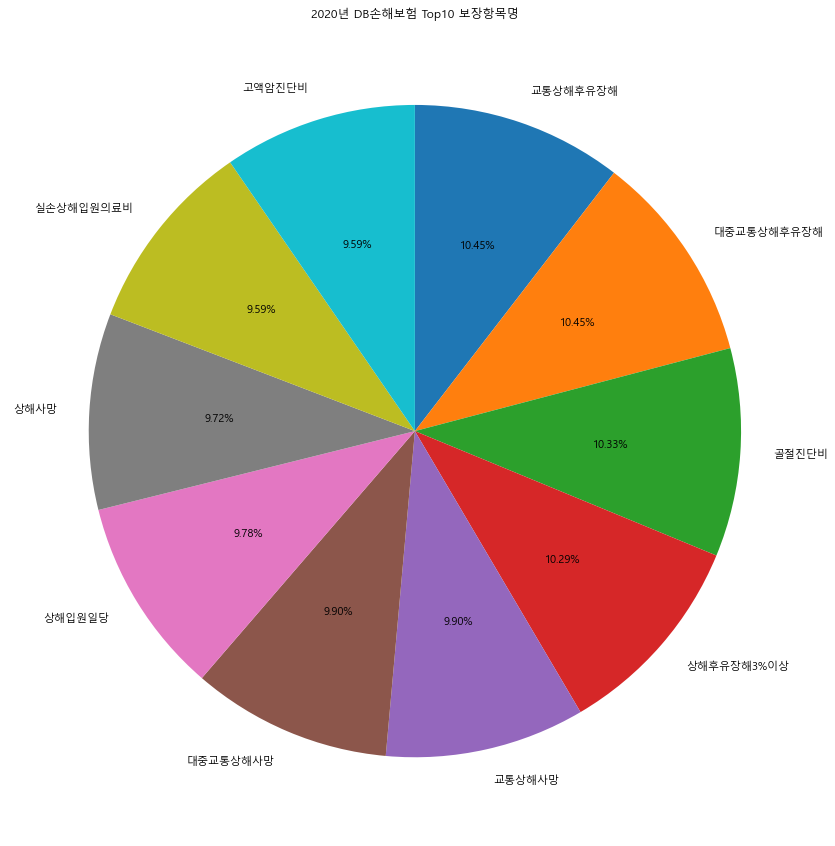

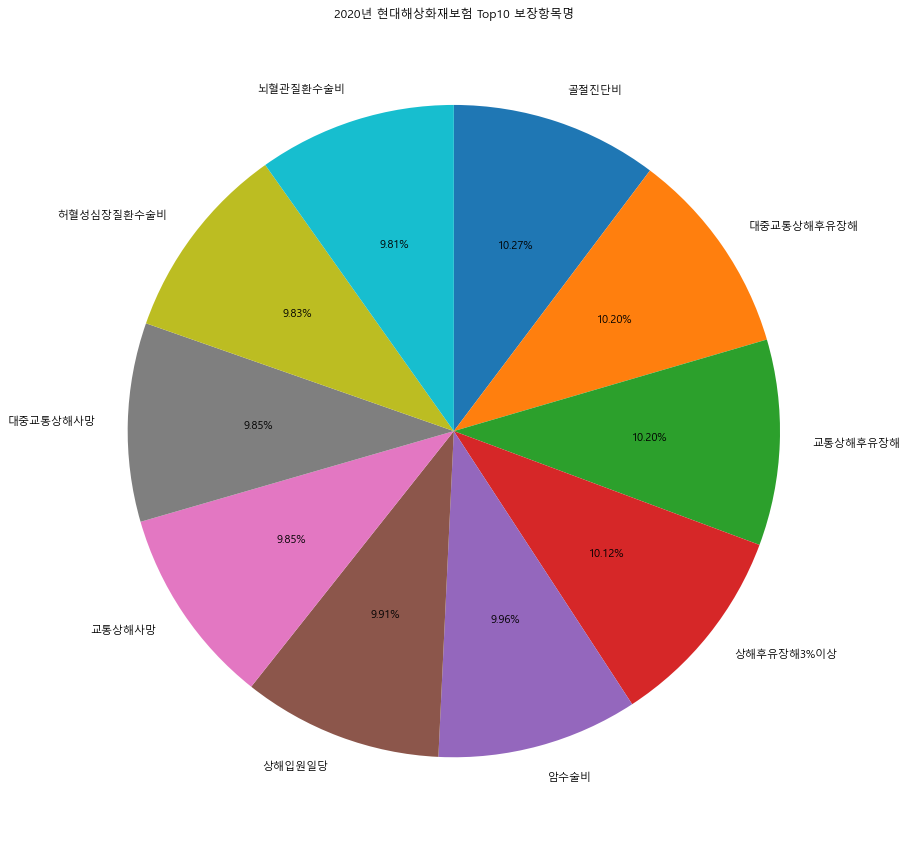

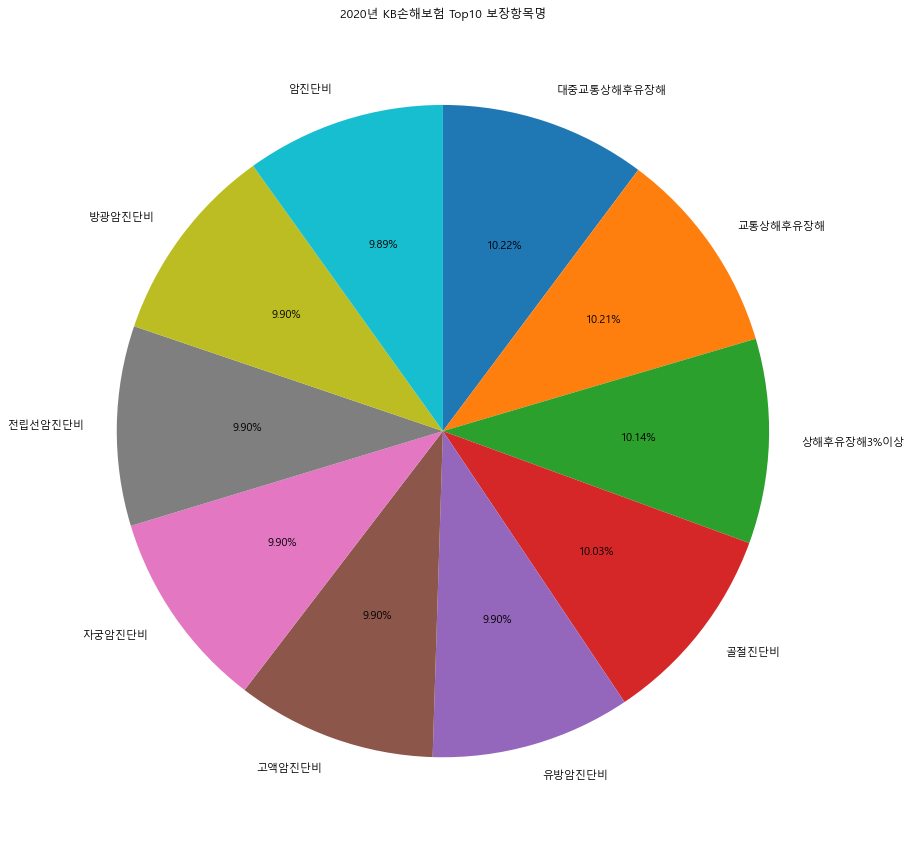

In [21]:
list=['메리츠화재보험','DB손해보험','현대해상화재보험','KB손해보험']

for index in list:
    df2020_co_cnt = df2020[df2020['보험회사명'] == index]['보장항목명'].value_counts().head(10)

    fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 하얀색

    plt.title("2020년 "+index+" Top10 보장항목명")
    plt.pie(x=df2020_co_cnt.values,
           labels=df2020_co_cnt.index,
           startangle=90,
           counterclock=False,
           textprops={'fontsize': 11},
           autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력

    plt.show()

In [22]:
male = bozang.loc[bozang['성별']=='M']
female = bozang.loc[bozang['성별']=='F']


m_age = male['연령그룹'].value_counts()
f_age = female['연령그룹'].value_counts()

print(m_age)
print(f_age)

30s    265192
40s    248028
50s    225574
20s    215044
60s    159711
70s     47539
10s     32159
1s       4238
80s      2121
90s        25
Name: 연령그룹, dtype: int64
40s    260544
50s    257712
30s    253045
20s    208879
60s    185147
70s     53007
10s     32985
1s       3520
80s      1896
Name: 연령그룹, dtype: int64


In [23]:
total_age = []
for i in range(len(m_age)):
    for j in range(len(f_age)):
        if m_age.index[i] == f_age.index[j]:
            total_age.append([m_age[i],f_age[j]])
    if m_age.index[i] == '90s':
            total_age.append([m_age[i], 0])
age_index = m_age.index

In [24]:
total_age = dict(zip(age_index, total_age))
total_age = pd.DataFrame(total_age)

total_age = total_age[['10s','20s','30s','40s','50s','60s','70s','80s','90s']]

total_age

,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,32159,215044,265192,248028,225574,159711,47539,2121,25
1,32985,208879,253045,260544,257712,185147,53007,1896,0


In [25]:
pie = Pie("각 연령별 성비")
style = Style()
pie_style = style.add(
    label_pos="center",
    is_label_show=True,
    label_text_color=None,
    is_legend_show=False,
    is_random=True
)
x = 10
y = 30
for i in range(len(total_age.columns)):
    pie.add(
      "", [str(total_age.columns[i])+"남성", str(total_age.columns[i])+"여성"],
        [total_age.iloc[0][i],total_age.iloc[1][i]],
        center = [x,y], radius = [25,40], **pie_style
    )
    if i < 4:
        x = x+25
    if i == 3:
        x = 10
        y = 75
    if i > 4:
        x = x+25
pie.render()
pie

In [26]:
name = total_age.columns
data = total_age.iloc[1]
pie = Pie("여성 계약자 수")
pie.add("여성 계약자 수", name, data, is_label_show=True)
pie

In [27]:
name = total_age.columns
data = total_age.iloc[0]
pie = Pie("남성 계약자 수")
pie.add("남성 계약자 수", name, data, is_label_show=True)
pie

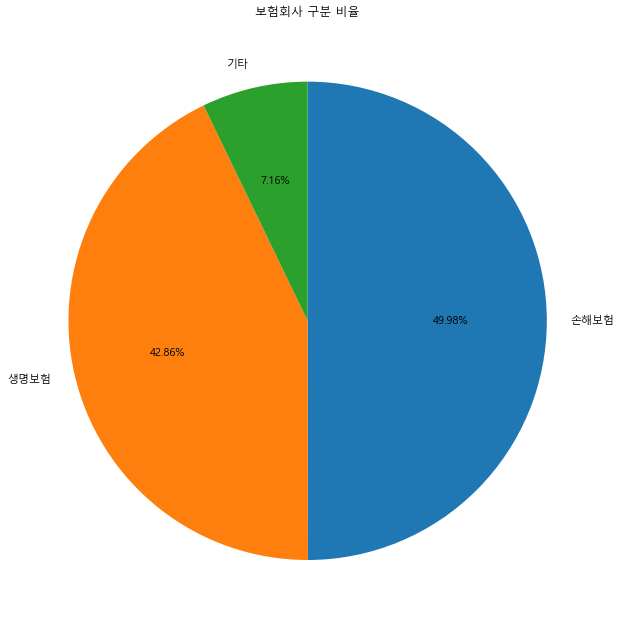

In [28]:
gubun = df2020['보험회사구분명'].value_counts()

fig = plt.figure(figsize=(11,11)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색

plt.title("보험회사 구분 비율")
plt.pie(x=gubun.values,
       labels=gubun.index,
       startangle=90,
       counterclock=False,
       textprops={'fontsize': 11},
       autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력

plt.show()

C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

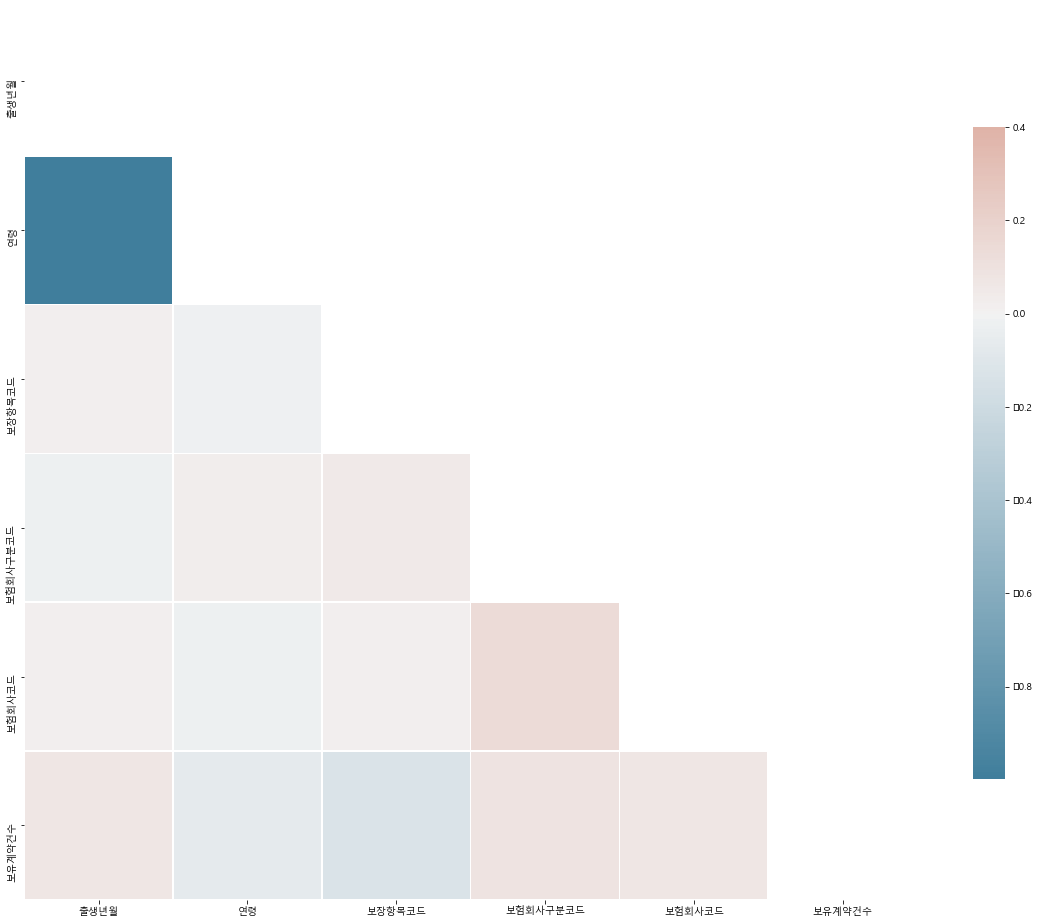

In [29]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20,20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

#ax.set_title("각 변수간의 상관 관계",pad=20,fontsize=15)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .6})

In [1]:
import pyecharts
print("pyecharts version : ", pyecharts.__version__)

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\pcn\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


pyecharts version :  0.5.11
